# Predicting Fertility Based on Health Statistics   



Fertility rate is measured as the total number of births for women of child bearing age per 1000 live births.  The total fertility rate is a significant indicator of a nation's population growth or population decline.  The fertility rate is affected by a range of factors including health, population dynamics, and socioeconomic factors.   

Fertility rates for 21 countries across all 7 continents will be analyzed and compared to determine the most significant factors affecting fertility.  Countries were selected by continent based on available data.  The 3 countries with the most data were selected from each continent.  As Antarctica is populated by approximately 5,000 transitional residents, there is no data from this continent.  To compensate for the lack of data from Antarctica, 5 countries were chosen from Asia, which is the largest and most populated continent.  Four countries were selected from Africa, which is the second largest and most populated continent.  Three countries each were selected from North America, South America, Europe and Australia/Oceania.  Initially, a subset of the data was used to conduct fertility analysis on North America, however the models performed poorly, so a larger subset of the data was used.  

This dataset answers some basic questions including which country has the highest and lowest average fertility rate?  Which country has the most stable fertility rate?  What are the most significant features affecting fertility rates?  


## Data Summary:  

The World Bank's Health, Nutrition and Population Statistics database provides key health, nutrition and population statistics gathered from a variety of international and national sources.  This dataset contains health, nutrition and population information for 217 countries and regions.  Themes include global surgery, health financing, HIV/AIDS, immunization, infectious diseases, medical resources and usage, noncommunicable diseases, nutrition, population dynamics, reproductive health, universal health coverage, and water and sanitation. This dataset was downloaded from http://www.worldbank.org.  
Source: https://datacatalog.worldbank.org/dataset/health-nutrition-and-population-statistics.  

In [1]:
from initial_cleaning import initial_cleaning

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_context('notebook', font_scale=1.5)

In [2]:
# import fertility rate csv & convert to df

fertile = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/World_Bank/fertility_rate.csv'))

  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...   2007  2008  2009  \
0  SP.DYN.TFRT.IN  4.82  4.66  4.47  4.27  4.06  3.84  ...   1.76  1.76  1.77   
1  SP.DYN.TFRT.IN  7.45  7.45  7.45  7.45  7.45  7.45  ...   6.46  6.25  6.04   
2  SP.DYN.TFRT.IN  7.48  7.52  7.56  7.59  7.61  7.62  ...   6.37  6.31  6.24   
3  SP.DYN.TFRT.IN  6.49  6.40  6.28  6.13  5.96  5.77  ...   1.67  1.65  1.65   
4  SP.DYN.TFRT.IN   nan   nan   nan   nan   nan   nan  ...   1.18  1.25  1.19   

   2010  2011  2012  2013  2014  2015  2016  
0  1.78  1.78  1.79  1.80  1

In [3]:
# view shape of dataframe

fertile.shape

(264, 61)

In [4]:
# get fertile column names

fertile.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [5]:
# rename columns

fertile = fertile.rename(columns = {'Country Name': 'Country', 'Country Code': 'Country_Code'
                     , 'Indicator Name': 'Indicator_Name', 'Indicator Code':'Indicator_Code'})

In [6]:
# https://stackoverflow.com/questions/45066873/pandas-melt-with-multiple-value-vars
# transform df

fertile = (fertile.set_index(['Country', 'Country_Code', 'Indicator_Name', 'Indicator_Code'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .reset_index())

In [7]:
fertile = fertile.rename(columns = {0:'Fertility_Rate'})

In [8]:
# verify transformation & columns renamed 

fertile.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Fertility_Rate
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,4.82
1,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1961,4.66
2,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1962,4.47
3,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1963,4.27
4,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1964,4.06


In [9]:
# import life expectancy csv & convert to df

life = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/World_Bank/life_expectancy.csv'))

  Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...   2007  2008  2009  \
0  SP.DYN.LE00.IN 65.66 66.07 66.44 66.79 67.11 67.44  ...  74.58 74.72 74.87   
1  SP.DYN.LE00.IN 32.29 32.74 33.19 33.62 34.06 34.49  ...  59.69 60.24 60.75   
2  SP.DYN.LE00.IN 33.25 33.57 33.91 34.27 34.65 35.03  ...  55.10 56.19 57.23   
3  SP.DYN.LE00.IN 62.28 63.30 64.19 64.91 65.46 65.85  ...  75.66 75.94 76.28   
4  SP.DYN.LE00.IN   nan   nan   nan   nan   nan   nan  ...    nan   nan   nan   

   2010  2011  2012  2013  2014  2015  2016  
0 75.02 75.16 75.30 75.44 75.58 75

In [10]:
# view shape of dataframe

life.shape

(264, 61)

In [11]:
# get life expectancy column names

life.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [12]:
# rename columns

life = life.rename(columns = {'Country Name': 'Country', 'Country Code': 'Country_Code'
                     , 'Indicator Name': 'Indicator_Name', 'Indicator Code':'Indicator_Code'})

In [13]:
# https://stackoverflow.com/questions/45066873/pandas-melt-with-multiple-value-vars
# transform df

life = (life.set_index(['Country', 'Country_Code', 'Indicator_Name', 'Indicator_Code'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .reset_index())

In [14]:
life = life.rename(columns = {0:'Life_Expectancy'})

In [15]:
# verify transformation & columns renamed 

life.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Life_Expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.66
1,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,66.07
2,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,66.44
3,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,66.79
4,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,67.11


In [16]:
# import population csv & convert to df

pop = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/World_Bank/country_population.csv'))

  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL   54211.00   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL 8996351.00   
2       Angola          AGO  Population, total    SP.POP.TOTL 5643182.00   
3      Albania          ALB  Population, total    SP.POP.TOTL 1608800.00   
4      Andorra          AND  Population, total    SP.POP.TOTL   13411.00   

        1961       1962       1963       1964       1965     ...      \
0   55438.00   56225.00   56695.00   57032.00   57360.00     ...       
1 9166764.00 9345868.00 9533954.00 9731361.00 9938414.00     ...       
2 5753024.00 5866061.00 5980417.00 6093321.00 6203299.00     ...       
3 1659800.00 1711319.00 1762621.00 1814135.00 1864791.00     ...       
4   14375.00   15370.00   16412.00   17469.00   18549.00     ...       

         2007        2008        2009        2010        2011        2012  \
0   101220.00   101353.00   10145

In [17]:
# view shape of dataframe

pop.shape

(264, 61)

In [18]:
# get population column names

pop.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [19]:
#  rename columns

pop = pop.rename(columns = {'Country Name': 'Country', 'Country Code': 'Country_Code'
                     , 'Indicator Name': 'Indicator_Name', 'Indicator Code':'Indicator_Code'})

In [20]:
# https://stackoverflow.com/questions/45066873/pandas-melt-with-multiple-value-vars
# transform df

pop = (pop.set_index(['Country', 'Country_Code', 'Indicator_Name', 'Indicator_Code'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .reset_index())

In [21]:
pop = pop.rename(columns = {0:'Population'})

In [22]:
# verify transformation & columns renamed 

pop.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.00
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438.00
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225.00
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695.00
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032.00


### Based on the selection criteria, the countries analyzed are listed by continent in descending order starting with the country with the most available data:  

**Asia** - Indonesia, Bangladesh, Phillipines, Nepal, Pakistan  
**Africa** - Burkina Faso, Senegal, Egypt, Arab Rep., Morocco   
**Europe** - Netherlands, Sweden, Spain  
**North America** - Mexico, Jamaica, Dominican Republic  
**South America** - Peru, Colombia, Ecuador  
**Australia/Oceania** - Australia, Papua New guinea, New Zealand 

In [23]:
# create df of countries

ind = pd.DataFrame(fertile[fertile.Country=='Indonesia'])
ban = pd.DataFrame(fertile[fertile.Country=='Bangladesh'])
phi = pd.DataFrame(fertile[fertile.Country=='Philippines'])
nepal = pd.DataFrame(fertile[fertile.Country=='Nepal'])
pak = pd.DataFrame(fertile[fertile.Country=='Pakistan'])
bur = pd.DataFrame(fertile[fertile.Country=='Burkina Faso'])
sen = pd.DataFrame(fertile[fertile.Country=='Senegal'])
egypt = pd.DataFrame(fertile[fertile.Country=='Egypt, Arab Rep.'])
mor = pd.DataFrame(fertile[fertile.Country=='Morocco'])

In [24]:
neth = pd.DataFrame(fertile[fertile.Country=='Netherlands'])
swe = pd.DataFrame(fertile[fertile.Country=='Sweden'])
spain = pd.DataFrame(fertile[fertile.Country=='Spain'])
mex = pd.DataFrame(fertile[fertile.Country=='Mexico'])
jam = pd.DataFrame(fertile[fertile.Country=='Jamaica'])
domrep = pd.DataFrame(fertile[fertile.Country=='Dominican Republic'])

In [25]:
peru = pd.DataFrame(fertile[fertile.Country=='Peru'])
col = pd.DataFrame(fertile[fertile.Country=='Colombia'])
ecu = pd.DataFrame(fertile[fertile.Country=='Ecuador'])
aus = pd.DataFrame(fertile[fertile.Country=='Australia'])
png = pd.DataFrame(fertile[fertile.Country=='Papua New Guinea'])
nze = pd.DataFrame(fertile[fertile.Country=='New Zealand'])

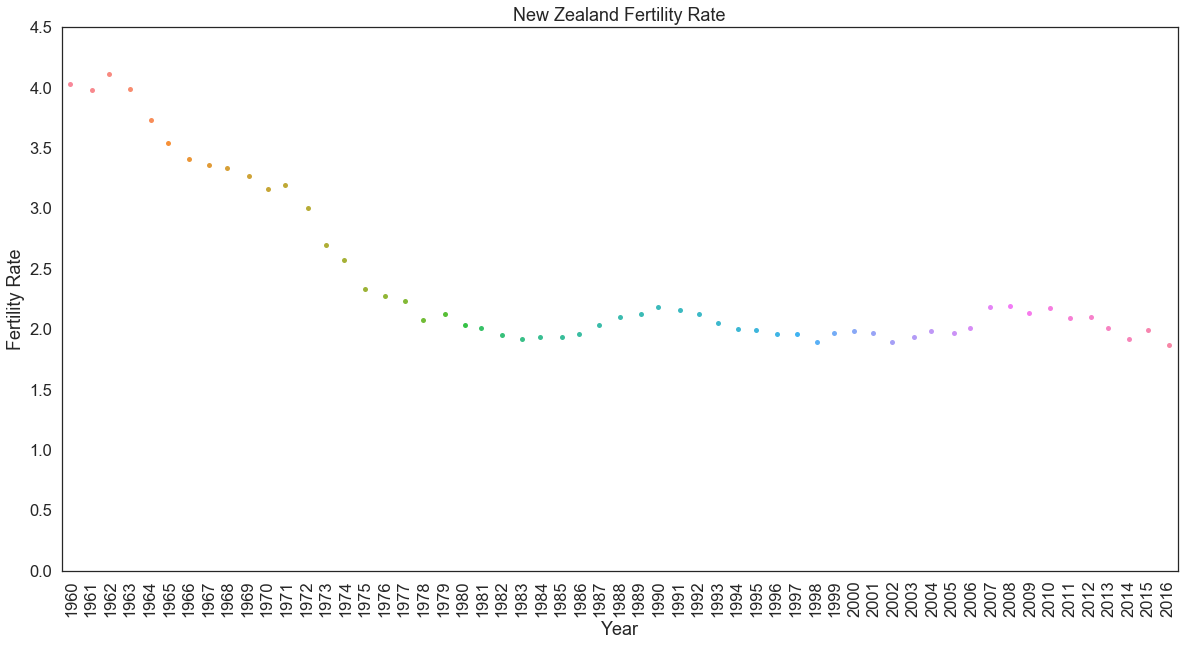

In [26]:
# New Zealand fertility rate, total (births, per woman)

sns.stripplot(x='Year', y='Fertility_Rate', data=nze)
plt.xticks(rotation=90)
plt.title('New Zealand Fertility Rate')
plt.ylabel('Fertility Rate')
plt.ylim(ymax=4.5)
plt.ylim(ymin=0);

In [27]:
# combine individual country dataframes & set column names

world = pd.concat([ind, ban, phi, nepal, pak, bur, sen, egypt, mor, neth, swe, spain, mex, jam, domrep, 
                  peru, col, ecu, aus, png, nze], axis=0, ignore_index=True)
world.columns = fertile.columns

In [28]:
# verify column names and data

world.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Fertility_Rate
0,Indonesia,IDN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,5.67
1,Indonesia,IDN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1961,5.66
2,Indonesia,IDN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1962,5.64
3,Indonesia,IDN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1963,5.63
4,Indonesia,IDN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1964,5.62


## How do the fertility rates of the 21 countries compare to each other?  

There doesn't appear to be any localization in fertility rates according to region.  Approximately 16 countries have average fertility rates of 3 or more births per woman.  The 5 countries with fertility rates less than 3 all originate from 2 continents, Europe and Australia/Oceania.

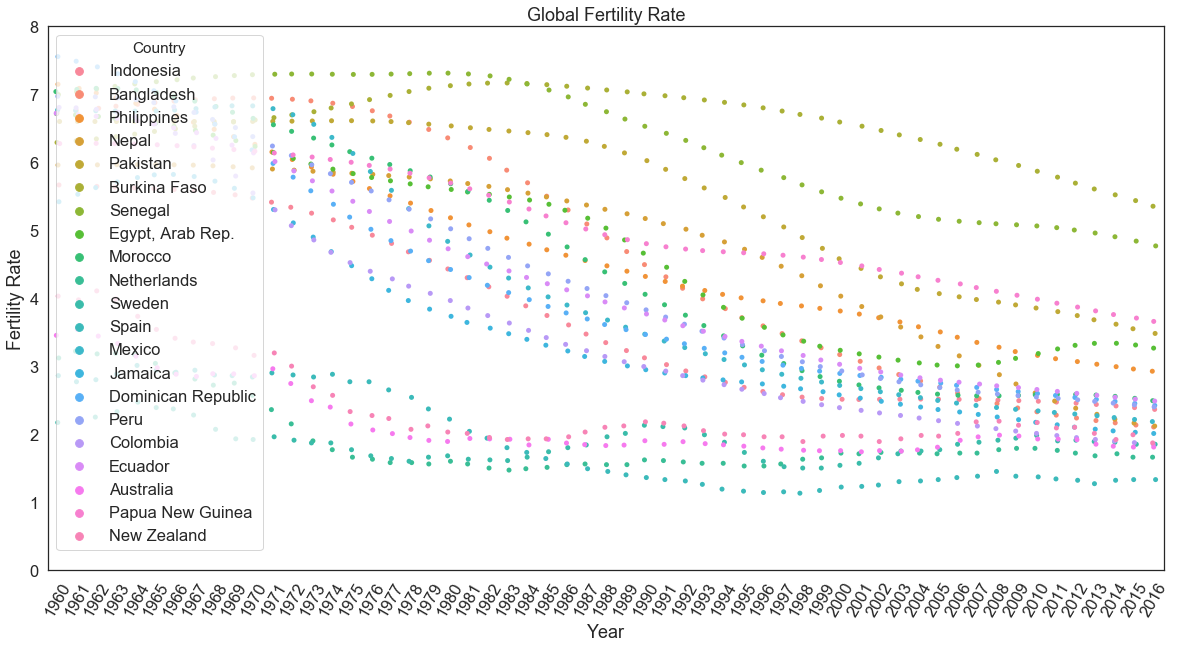

In [29]:
# global fertility rate, total (births, per woman)

sns.stripplot(x='Year', y='Fertility_Rate', data=world, hue='Country')
plt.xticks(rotation=60)
plt.title('Global Fertility Rate')
plt.ylabel('Fertility Rate')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

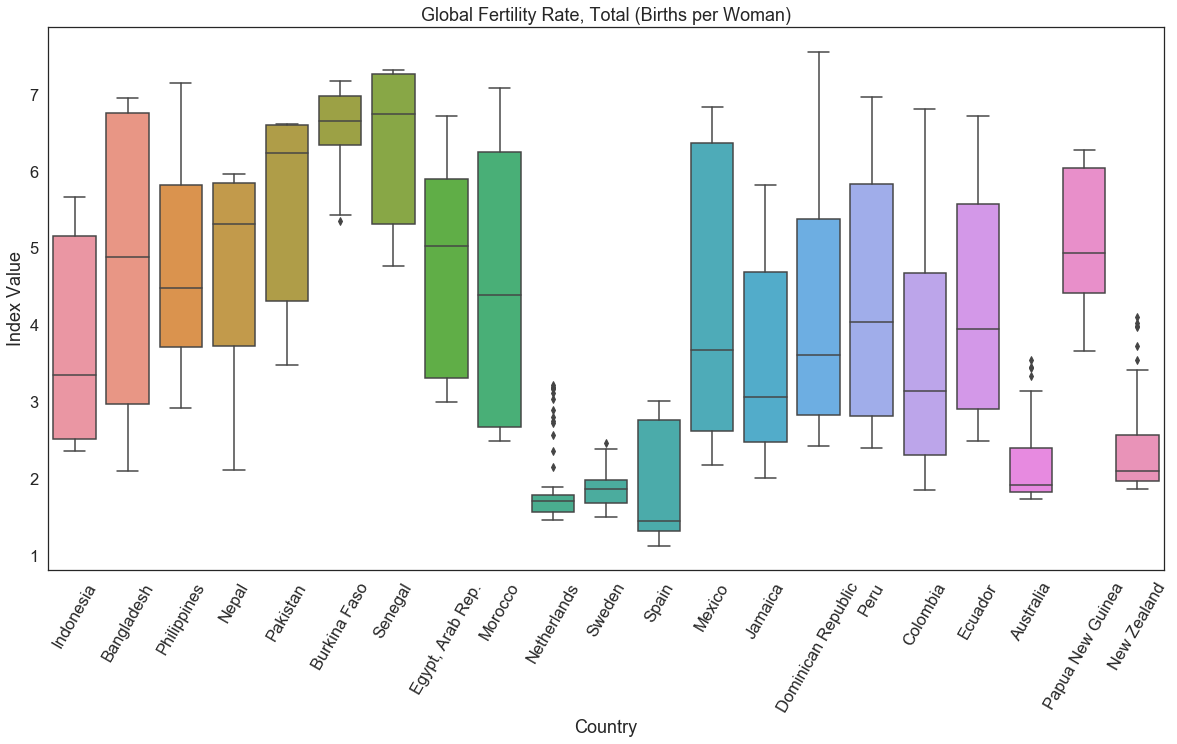

In [30]:
# global fertility rate, total (births, per woman)

sns.boxplot(x='Country', y='Fertility_Rate', data=world)
plt.xticks(rotation=60)
plt.title('Global Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value');

## Which country has the highest average fertility rate?  

Based on the boxplot, Senegal appears to have the highest average fertility rate.  A closer look at a bar graph and statistics for Senegal's fertility rate confirms that Senegal does have the highest fertility rate of the selected countries.  

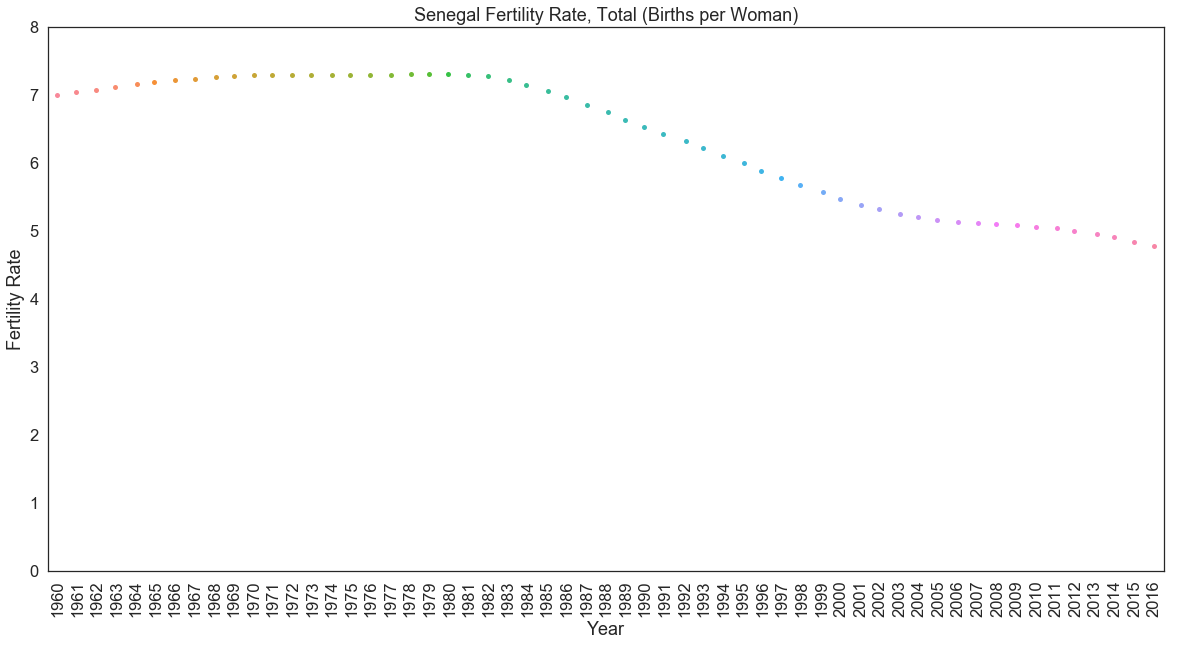

In [42]:
# Senegal fertility rate, total (births, per woman)

sns.stripplot(x='Year', y='Fertility_Rate', data=sen)
plt.xticks(rotation=90)
plt.title('Senegal Fertility Rate, Total (Births per Woman)')
plt.ylabel('Fertility Rate')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

In [39]:
sen.describe()

,Fertility_Rate
count,57.00
mean,6.36
std,0.94
min,4.77
25%,5.31
50%,6.74
75%,7.26
max,7.31


## Which country has the lowest average fertility rate?   

Sweden has the lowest fertility rate with an average fertility rate of 1.87 births per woman.   

Additionally, Sweden also has the most stable fertility rate as measured by standard deviation. The lower the standard deviation, the less variance in fertility rate from year to year. While there are several countries with seemingly low variance, Sweden has the most stable fertility rate with a standard deviation of 0.24.

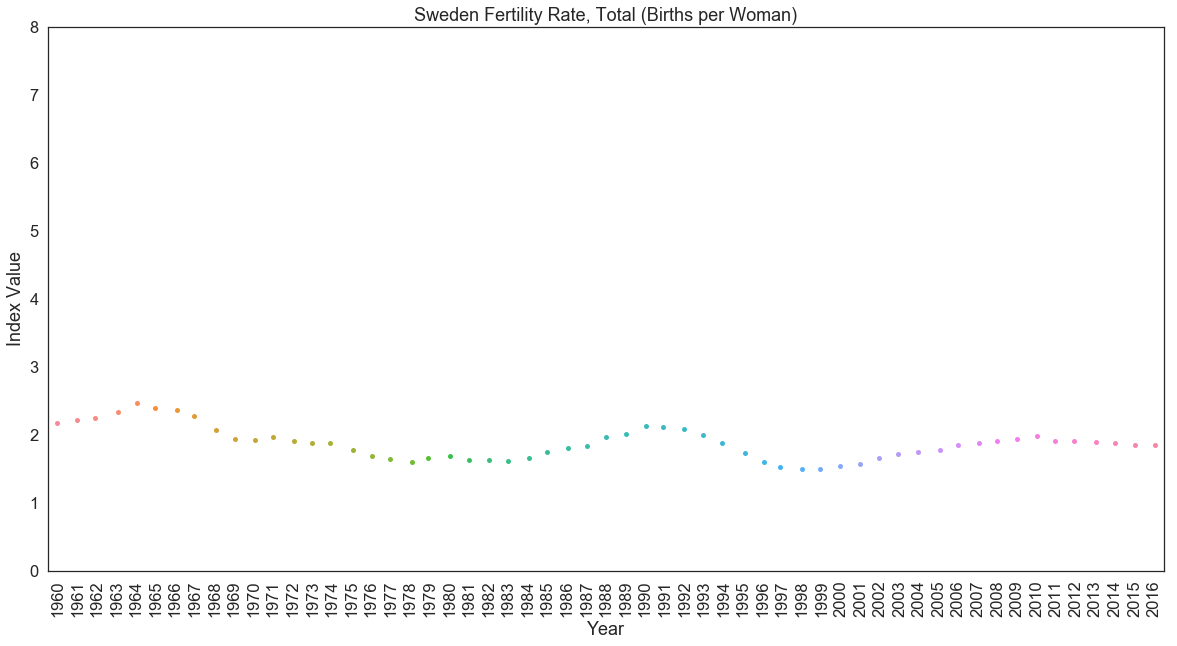

In [43]:
# Sweden fertility rate, total (births, per woman)

sns.stripplot(x='Year', y='Fertility_Rate', data=swe)
plt.xticks(rotation=90)
plt.title('Sweden Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

In [41]:
swe.describe()

,Fertility_Rate
count,57.00
mean,1.87
std,0.24
min,1.50
25%,1.68
50%,1.87
75%,1.98
max,2.47


In [40]:
neth.describe()

,Fertility_Rate
count,57.00
mean,1.92
std,0.55
min,1.47
25%,1.57
50%,1.71
75%,1.79
max,3.22


In [42]:
spain.describe()

,Fertility_Rate
count,57.00
mean,1.90
std,0.71
min,1.13
25%,1.32
50%,1.45
75%,2.77
max,3.01


In [63]:
# create df of countries

indlife = pd.DataFrame(life[life.Country=='Indonesia'])
banlife = pd.DataFrame(life[life.Country=='Bangladesh'])
philife = pd.DataFrame(life[life.Country=='Philippines'])
nepallife = pd.DataFrame(life[life.Country=='Nepal'])
paklife = pd.DataFrame(life[life.Country=='Pakistan'])
burlife = pd.DataFrame(life[life.Country=='Burkina Faso'])
senlife = pd.DataFrame(life[life.Country=='Senegal'])
egyptlife = pd.DataFrame(life[life.Country=='Egypt, Arab Rep.'])
morlife = pd.DataFrame(life[life.Country=='Morocco'])

In [64]:
nethlife = pd.DataFrame(life[life.Country=='Netherlands'])
swelife = pd.DataFrame(life[life.Country=='Sweden'])
spainlife = pd.DataFrame(life[life.Country=='Spain'])
mexlife = pd.DataFrame(life[life.Country=='Mexico'])
jamlife = pd.DataFrame(life[life.Country=='Jamaica'])
domreplife = pd.DataFrame(life[life.Country=='Dominican Republic'])

In [65]:
perulife = pd.DataFrame(life[life.Country=='Peru'])
collife = pd.DataFrame(life[life.Country=='Colombia'])
eculife = pd.DataFrame(life[life.Country=='Ecuador'])
auslife = pd.DataFrame(life[life.Country=='Australia'])
pnglife = pd.DataFrame(life[life.Country=='Papua New Guinea'])
nzelife = pd.DataFrame(life[life.Country=='New Zealand'])

In [66]:
# combine individual country dataframes & set column names

worldlife = pd.concat([indlife, banlife, philife, nepallife, paklife, burlife, senlife, egyptlife, morlife, nethlife, 
                       swelife, spainlife, mexlife, jamlife, domreplife, perulife, collife, eculife, auslife, pnglife, 
                       nzelife], axis=0, ignore_index=True)
worldlife.columns = life.columns

In [67]:
worldlife.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Life_Expectancy
0,Indonesia,IDN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,48.65
1,Indonesia,IDN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,49.28
2,Indonesia,IDN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,49.90
3,Indonesia,IDN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,50.50
4,Indonesia,IDN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,51.09


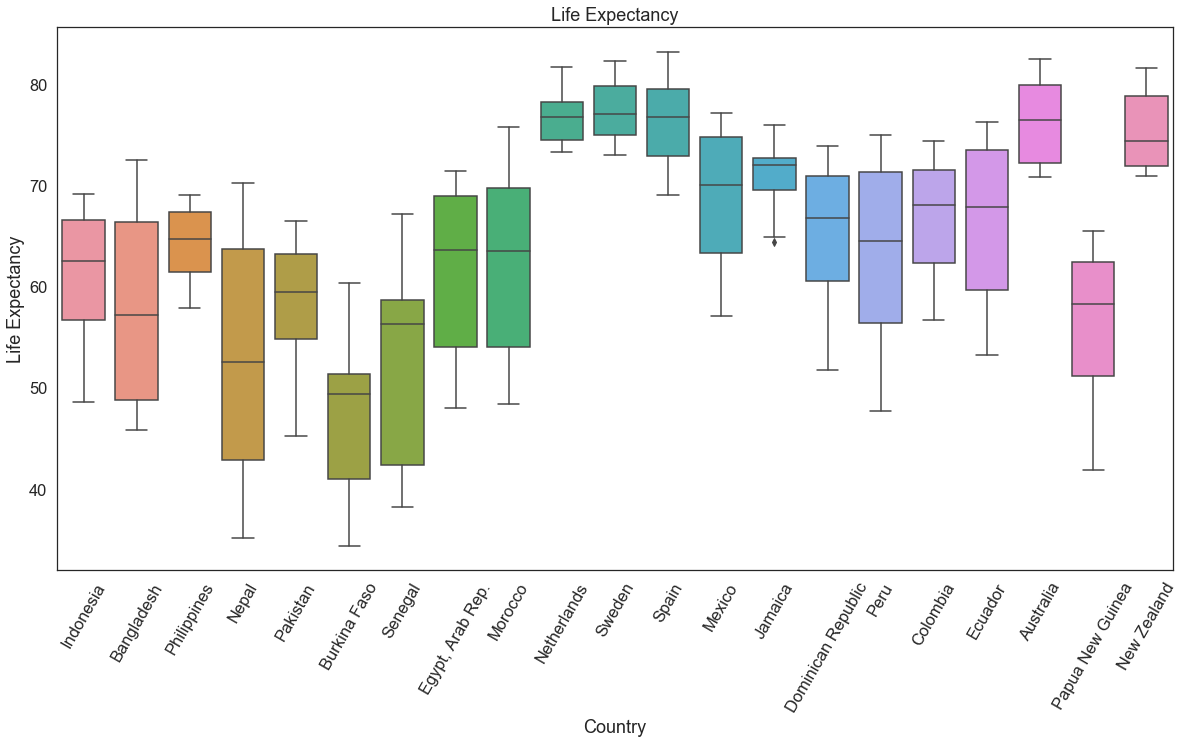

In [68]:
# global life expectancy, total (births, per woman)

sns.boxplot(x='Country', y='Life_Expectancy', data=worldlife)
plt.xticks(rotation=60)
plt.title('Life Expectancy')
plt.ylabel('Life Expectancy');

In [69]:
nethlife.describe()

,Life_Expectancy
count,57.00
mean,76.81
std,2.60
min,73.32
25%,74.50
50%,76.73
75%,78.29
max,81.71


In [70]:
swelife.describe()

,Life_Expectancy
count,57.00
mean,77.51
std,2.87
min,73.01
25%,74.97
50%,77.09
75%,79.85
max,82.25


In [71]:
spainlife.describe()

,Life_Expectancy
count,57.00
mean,76.45
std,4.08
min,69.11
25%,72.97
50%,76.75
75%,79.57
max,83.23


In [72]:
auslife.describe()

,Life_Expectancy
count,57.00
mean,76.29
std,4.06
min,70.82
25%,72.24
50%,76.43
75%,79.94
max,82.50


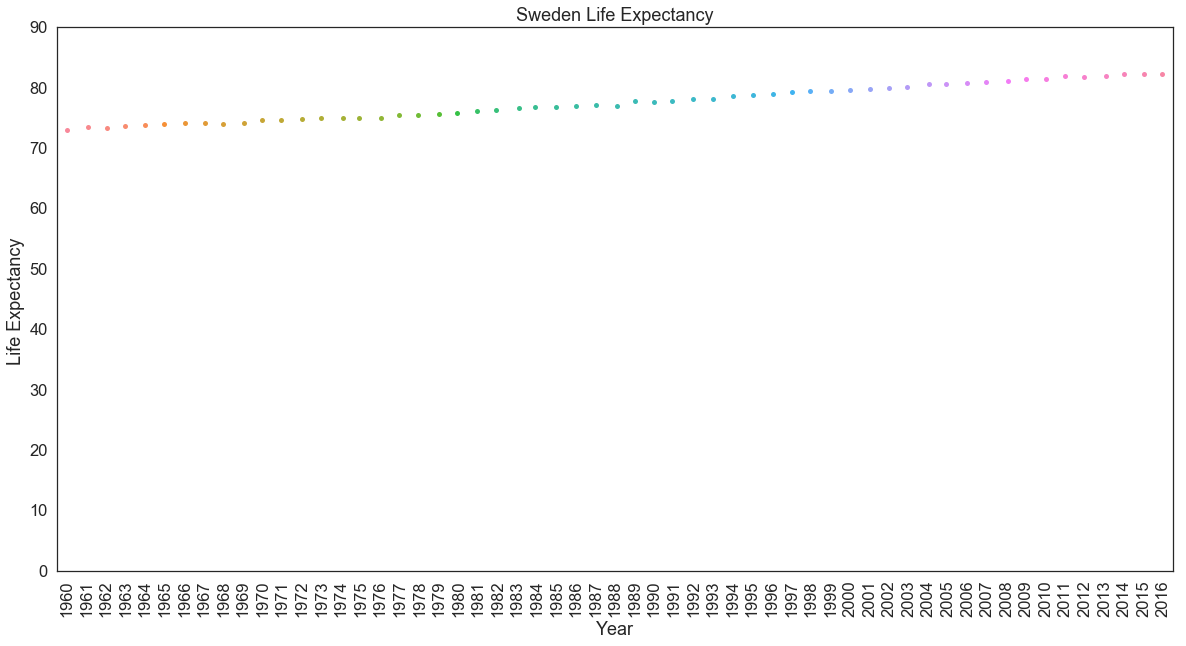

In [75]:
# Sweden life expectancy

sns.stripplot(x='Year', y='Life_Expectancy', data=swelife)
plt.xticks(rotation=90)
plt.title('Sweden Life Expectancy')
plt.ylabel('Life Expectancy ')
plt.ylim(ymax=90)
plt.ylim(ymin=0);

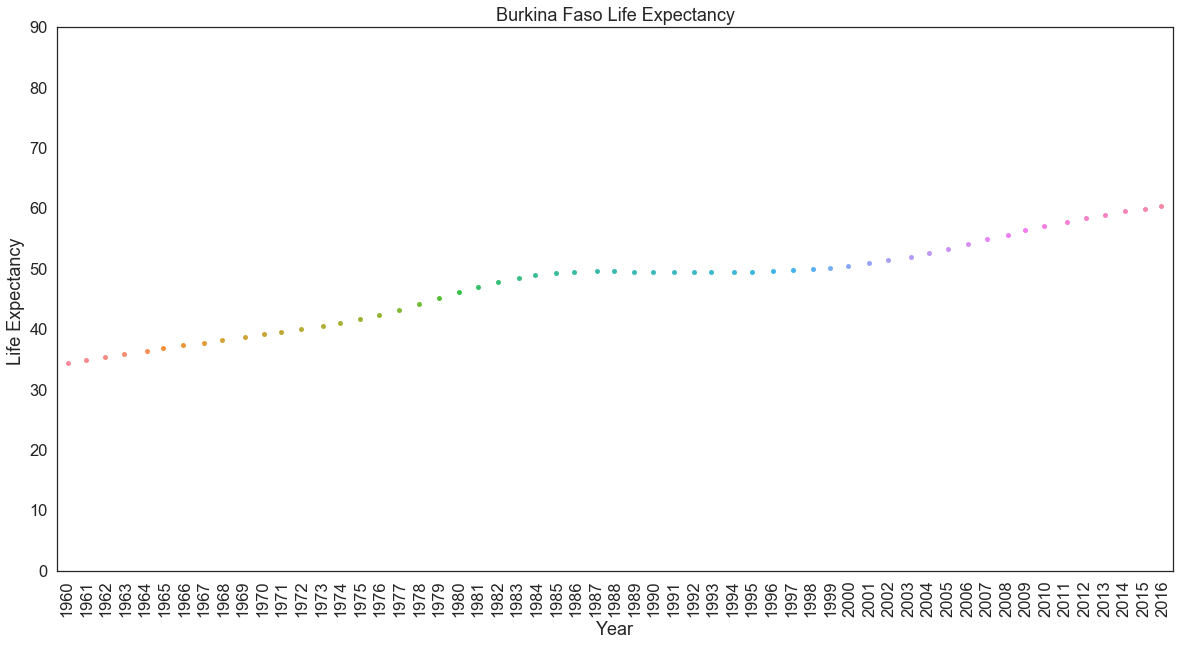

In [76]:
# Burkina Faso life expectancy

sns.stripplot(x='Year', y='Life_Expectancy', data=burlife)
plt.xticks(rotation=90)
plt.title('Burkina Faso Life Expectancy')
plt.ylabel('Life Expectancy ')
plt.ylim(ymax=90)
plt.ylim(ymin=0);

In [77]:
burlife.describe()

,Life_Expectancy
count,57.00
mean,47.49
std,7.23
min,34.43
25%,41.02
50%,49.38
75%,51.38
max,60.36


In [78]:
# create df of countries

indpop = pd.DataFrame(pop[pop.Country=='Indonesia'])
banpop = pd.DataFrame(pop[pop.Country=='Bangladesh'])
phipop = pd.DataFrame(pop[pop.Country=='Philippines'])
nepalpop = pd.DataFrame(pop[pop.Country=='Nepal'])
pakpop = pd.DataFrame(pop[pop.Country=='Pakistan'])
burpop = pd.DataFrame(pop[pop.Country=='Burkina Faso'])
senpop = pd.DataFrame(pop[pop.Country=='Senegal'])
egyptpop = pd.DataFrame(pop[pop.Country=='Egypt, Arab Rep.'])
morpop = pd.DataFrame(pop[pop.Country=='Morocco'])

In [79]:
nethpop = pd.DataFrame(pop[pop.Country=='Netherlands'])
swepop = pd.DataFrame(pop[pop.Country=='Sweden'])
spainpop = pd.DataFrame(pop[pop.Country=='Spain'])
mexpop = pd.DataFrame(pop[pop.Country=='Mexico'])
jampop = pd.DataFrame(pop[pop.Country=='Jamaica'])
domreppop = pd.DataFrame(pop[pop.Country=='Dominican Republic'])

In [80]:
perupop = pd.DataFrame(pop[pop.Country=='Peru'])
colpop = pd.DataFrame(pop[pop.Country=='Colombia'])
ecupop = pd.DataFrame(pop[pop.Country=='Ecuador'])
auspop = pd.DataFrame(pop[pop.Country=='Australia'])
pngpop = pd.DataFrame(pop[pop.Country=='Papua New Guinea'])
nzepop = pd.DataFrame(pop[pop.Country=='New Zealand'])

In [81]:
# combine individual country dataframes & set column names

worldpop = pd.concat([indpop, banpop, phipop, nepalpop, pakpop, burpop, senpop, egyptpop, morpop, nethpop, swepop, 
                      spainpop, mexpop, jampop, domreppop, perupop, colpop, ecupop, auspop, pngpop, nzepop], 
                     axis=0, ignore_index=True)
worldpop.columns = pop.columns

In [82]:
worldpop.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Population
0,Indonesia,IDN,"Population, total",SP.POP.TOTL,1960,87792515.00
1,Indonesia,IDN,"Population, total",SP.POP.TOTL,1961,90138235.00
2,Indonesia,IDN,"Population, total",SP.POP.TOTL,1962,92558005.00
3,Indonesia,IDN,"Population, total",SP.POP.TOTL,1963,95055665.00
4,Indonesia,IDN,"Population, total",SP.POP.TOTL,1964,97638029.00


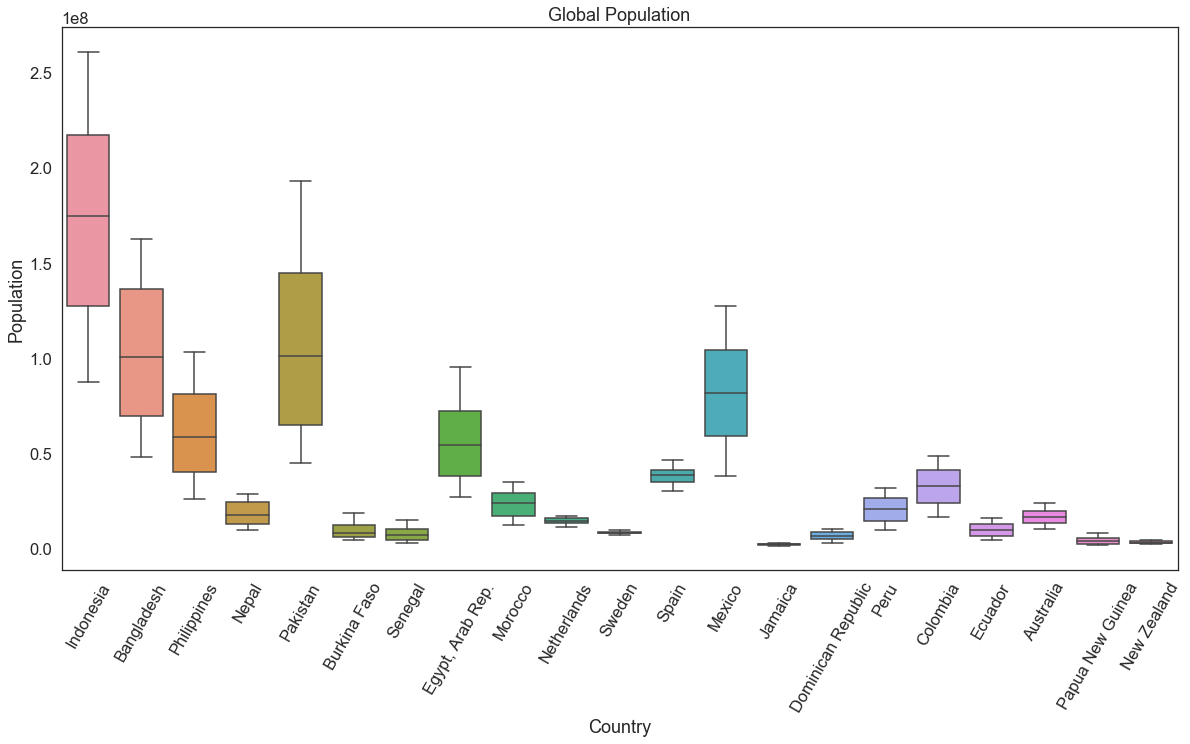

In [83]:
# global life expectancy, total (births, per woman)

sns.boxplot(x='Country', y='Population', data=worldpop)
plt.xticks(rotation=60)
plt.title('Global Population')
plt.ylabel('Population');

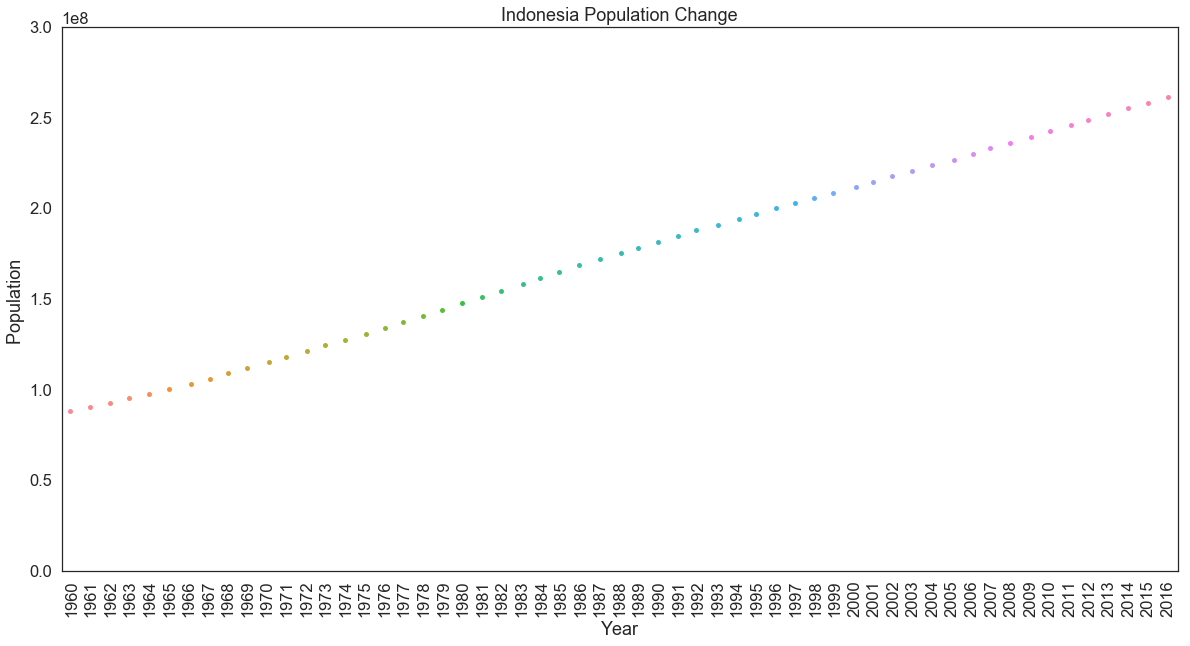

In [85]:
# Burkina Faso life expectancy

sns.stripplot(x='Year', y='Population', data=indpop)
plt.xticks(rotation=90)
plt.title('Indonesia Population Change')
plt.ylabel('Population ')
plt.ylim(ymax=300000000)
plt.ylim(ymin=0);

In [86]:
jampop.describe()

,Population
count,57.00
mean,2335293.07
std,394051.15
min,1628252.00
25%,1998034.00
50%,2393534.00
75%,2695446.00
max,2881355.00


In [87]:
swepop.describe()

,Population
count,57.00
mean,8560342.28
std,605246.37
min,7484656.00
25%,8159955.00
50%,8436489.00
75%,8924958.00
max,9923085.00


In [88]:
nzepop.describe()

,Population
count,57.00
mean,3454078.95
std,635771.11
min,2371800.00
25%,3023700.00
50%,3283400.00
75%,3948500.00
max,4693200.00


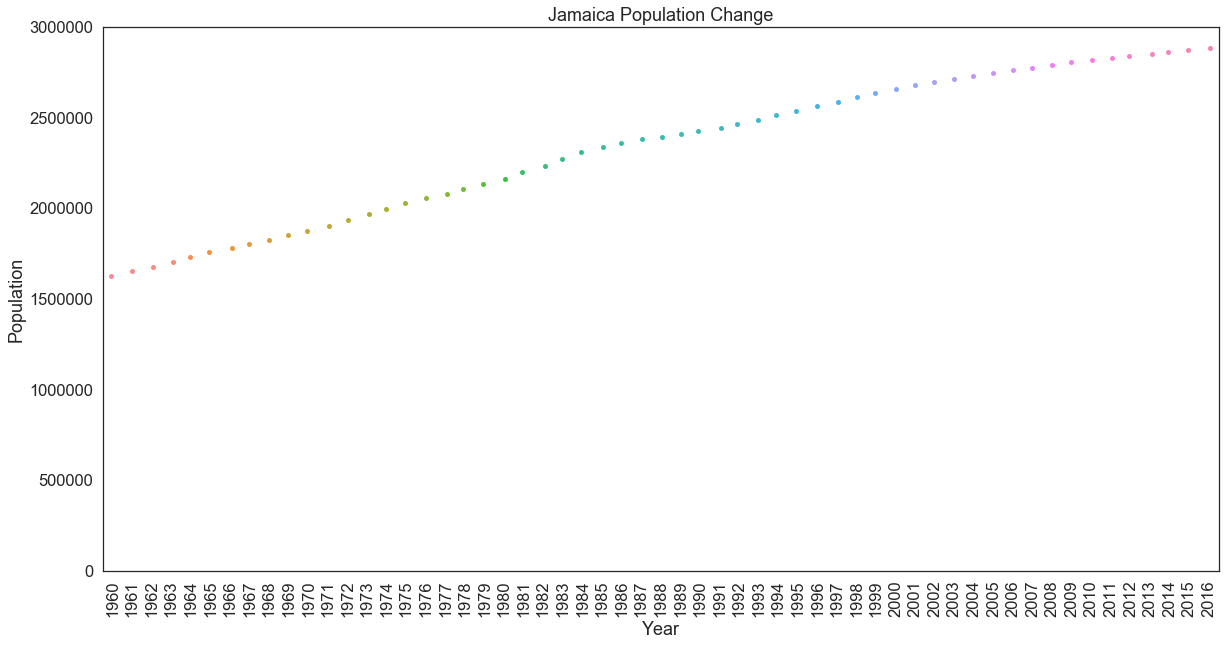

In [90]:
# Jamaica population change

sns.stripplot(x='Year', y='Population', data=jampop)
plt.xticks(rotation=90)
plt.title('Jamaica Population Change')
plt.ylabel('Population')
plt.ylim(ymax=3000000)
plt.ylim(ymin=0);

### Correlation Matrix   

Based on the correlation matrix, there is virtually no correlation between features.

In [44]:
# get dummies for world df

features = pd.get_dummies(world)

In [45]:
features.shape

(1197, 102)

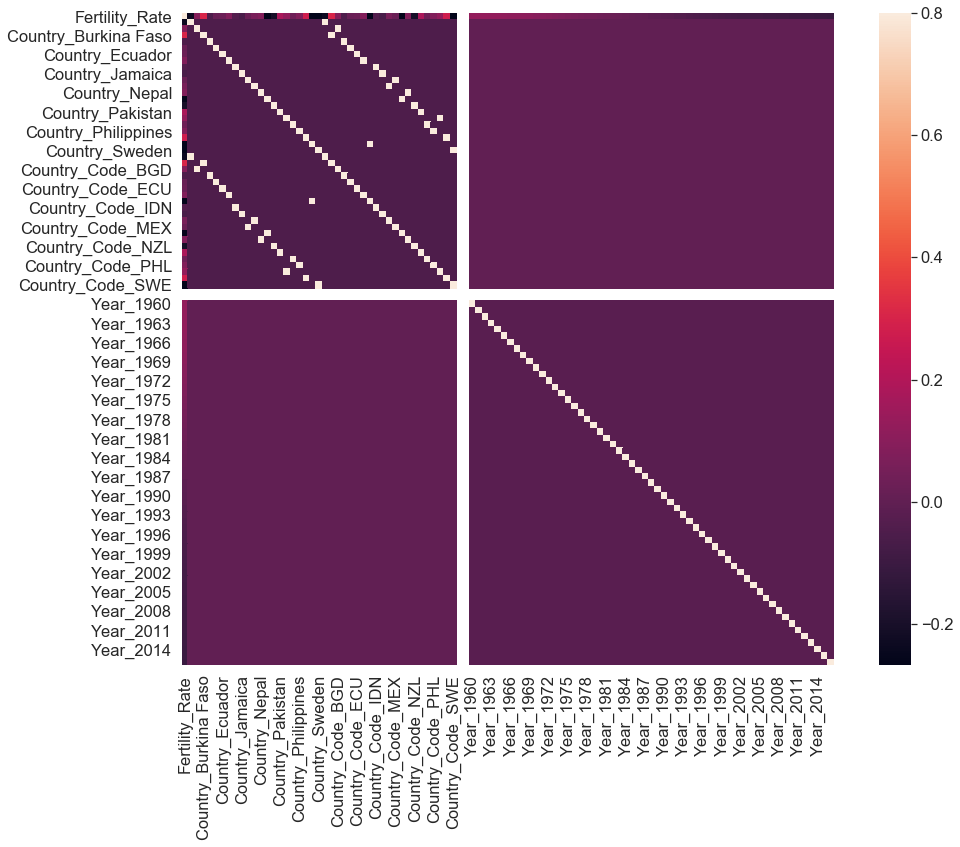

In [46]:
# index value is the only numeric column

corrmat = features.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [47]:
features.corr()

,Fertility_Rate,Country_Australia,Country_Bangladesh,Country_Burkina Faso,Country_Colombia,Country_Dominican Republic,Country_Ecuador,"Country_Egypt, Arab Rep.",Country_Indonesia,Country_Jamaica,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
Fertility_Rate,1.00,-0.23,0.09,0.30,-0.05,0.02,0.02,0.08,-0.04,-0.06,...,-0.09,-0.09,-0.09,-0.09,-0.10,-0.10,-0.10,-0.10,-0.11,-0.11
Country_Australia,-0.23,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Bangladesh,0.09,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Burkina Faso,0.30,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Colombia,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Dominican Republic,0.02,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Ecuador,0.02,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"Country_Egypt, Arab Rep.",0.08,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Indonesia,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Jamaica,-0.06,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Supervised Learning Model Selection and Evaluation:  

Several supervised models were tested and evaluated based on accuracy and recall.  Accuracy is how close a measured value is to the actual (true) value.  Recall is defined as the ratio of tp/(tp + fn) where tp is the number of true positives and fn the number of false negatives.  The recall is the intuitive ability of the classifier to find and correctly classify all the true positive samples.  

The supervised models evaluated and tested include random forest classifier, support vector machine classifier, XGBoost classifier and CatBoost Classifier.  Feature importance was calculated for both random forest and XGBoost.

In [48]:
from sklearn.model_selection import train_test_split

y = features['Fertility_Rate']
features.drop(['Fertility_Rate'], axis=1, inplace=True)

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

In [50]:
# random forest classifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)

cross_val_score(rfr, X_test, y_test, cv=10)

array([ 0.82980506,  0.70801415,  0.83872074,  0.86829178,  0.83685667,
        0.64081303,  0.71117878,  0.74697529,  0.61150657,  0.85905754])

**The cross validation scores suggest overfitting, so checking recall might be a more accurate indicator of model performance.**

RFC: 0.999868 (0.000085)
SVC: 0.999902 (0.000115)
XGB: 0.999902 (0.000115)
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
CBC: 0.999902 (0.000115)


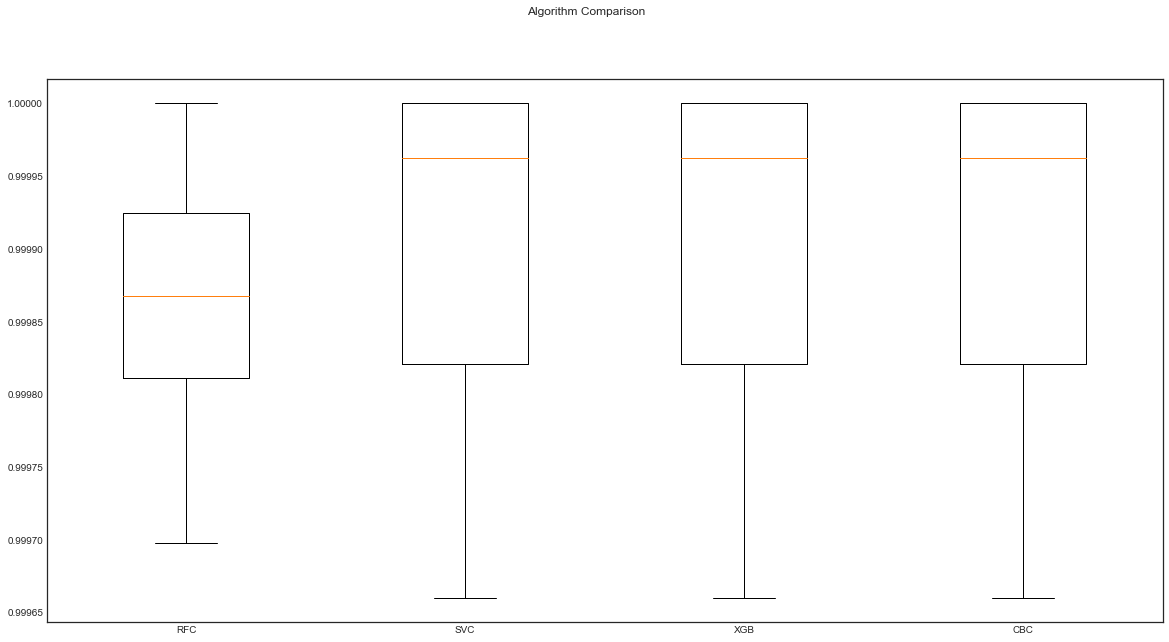

In [44]:
# model comparison

from sklearn import model_selection

guidance = features.values
X = guidance[:,0:8]
Y = guidance[:,8]

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('RFC', ensemble.RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('CBC', CatBoostClassifier(silent=True)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

**Looking at model comparisons, random forest with a score of 0.999887 has the lowest accuracy of the four models compared.  However, random forest also has a recall score of 83.2% which makes it a suitable performer after catboost classifier.  SVC had the lowest cross validation and recall scores, which makes it less suitable for this dataset. Xgboost has high accuracy and 0% recall, indicate that this model's performance isn't consistent.  Random forest, xgboost, and catboost model performance will be re-evaluated after feature engineering.**

## What are the most significant features influencing fertility rates?  

Random forest classifier identifies index value, the percentage of the male population aged 50-54 and 65-69, and the annual rate of urban population growth.  Index value is the most important feature for predicting fertility, with each additional feature contributing nearly equally for random forest.

The xgboost classifier identifies index value, and the percentage of the female population aged 50-54, 60-64 and 45-49.

                                  importance
Feature                                     
Index_Value                             0.27
Indicator_Code_SP.POP.5054.MA.5Y        0.02
Indicator_Code_SP.POP.6569.MA.5Y        0.02
Indicator_Code_SP.URB.GROW              0.01
Indicator_Code_SP.POP.6064.FE.5Y        0.01
Indicator_Code_SP.POP.5559.FE.5Y        0.01
Indicator_Code_SP.POP.4549.MA.5Y        0.01
Indicator_Code_SP.POP.3539.MA.5Y        0.01
Indicator_Code_SH.DYN.NMRT              0.01
Indicator_Code_SP.POP.5559.MA.5Y        0.01
Indicator_Code_SP.POP.2529.MA.5Y        0.01
Indicator_Code_SP.POP.2529.FE.5Y        0.01
Indicator_Code_SP.POP.4044.FE.5Y        0.01
Indicator_Code_SP.POP.6569.FE.5Y        0.01
Indicator_Code_SP.POP.7074.FE.5Y        0.01
Indicator_Code_SH.XPD.EHEX.PC.CD        0.01
Indicator_Code_SE.TER.ENRR.FE           0.01
Indicator_Code_SP.POP.3034.FE.5Y        0.01
Indicator_Code_SP.URB.TOTL.IN.ZS        0.01
Indicator_Code_SH.MED.PHYS.ZS           0.01


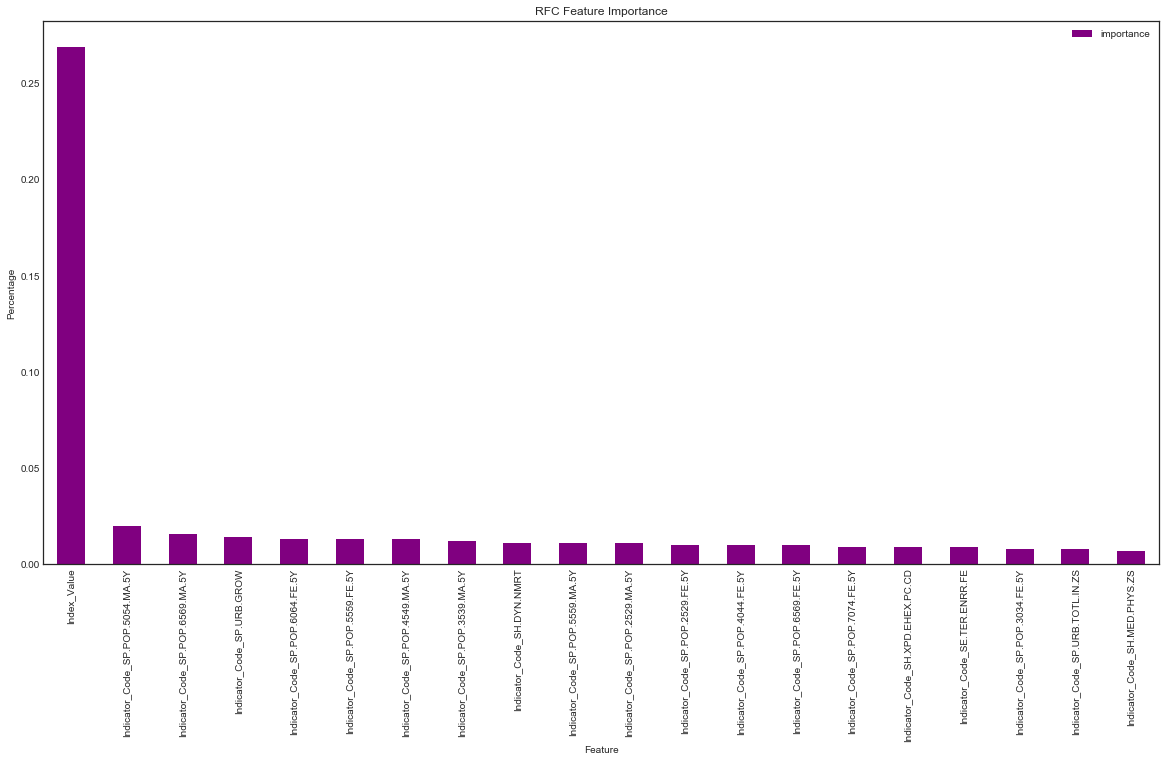

In [45]:
importances = pd.DataFrame({'Feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('Feature')
 
print(importances[:20])
importances[:20].plot.bar(color='purple')
plt.title('RFC Feature Importance')
plt.ylabel('Percentage');

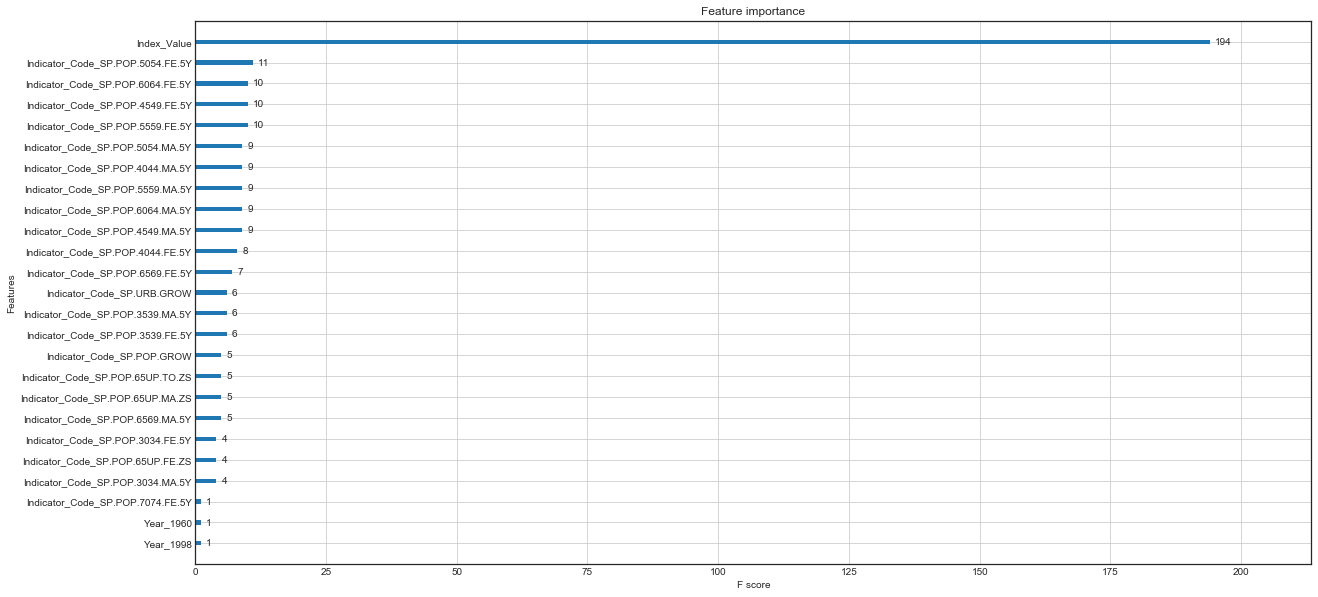

In [46]:
# xgboost classifier

from xgboost import plot_importance

plot_importance(xgb)
plt.show()

**XGBoost uses an F-score to determine feature importance. The F-score is a measure of how many times each feature is split on.**

In [47]:
# delete variables; models perform better

del X_train
del X_test
del y_pred
del rfc
del svc
del xgb
del cbc
del models

## Dimensionality Reduction via Principal Components Analysis (PCA)

In [54]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pca.components_

array([[  1.23875722e-02,  -2.75028279e-01,   1.76607368e-01,
         -5.81994411e-02,   1.35612138e-01,  -1.20001085e-02,
         -1.01968222e-01,   1.51765196e-01,  -8.44782138e-02,
          2.06218565e-03,  -1.03580681e-01,   2.81649393e-01,
          1.21652406e-01,   1.58470250e-01,  -1.78217068e-01,
         -2.04587290e-01,  -1.77689338e-01,   1.39362241e-01,
         -1.36736822e-02,   2.08976156e-01,  -1.79122584e-01,
          1.23875722e-02,   1.76607368e-01,  -2.75028279e-01,
         -5.81994411e-02,   1.35612138e-01,  -1.20001085e-02,
         -1.01968222e-01,   2.08976156e-01,   1.51765196e-01,
         -8.44782138e-02,  -1.03580681e-01,   2.06218565e-03,
          1.21652406e-01,   2.81649393e-01,   1.58470250e-01,
         -1.78217068e-01,  -1.77689338e-01,   1.39362241e-01,
         -2.04587290e-01,  -1.36736822e-02,  -1.79122584e-01,
         -0.00000000e+00,  -0.00000000e+00,   9.81589163e-08,
         -5.99022052e-08,  -3.49827321e-08,  -1.25400610e-08,
        

In [56]:
pca.transform(features)

array([[ 0.30353049, -0.11925502],
       [ 0.30353033, -0.1192547 ],
       [ 0.30353036, -0.11925517],
       ..., 
       [ 0.31694067,  0.03733747],
       [ 0.31694079,  0.03733752],
       [ 0.3169405 ,  0.03733704]])

In [57]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([ 0.03298611,  0.03298611])

In [58]:
X_pca = pca.transform(features)

## K-Means Clustering

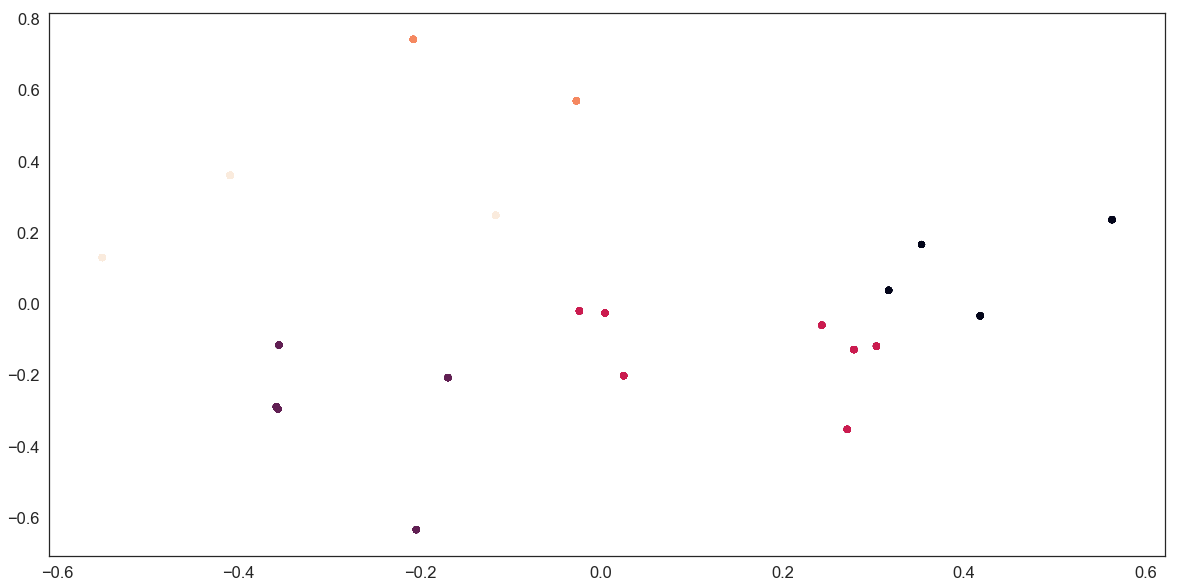

Comparing k-means clusters against the data:
Fertility_Rate  1.13  1.14  1.15  1.16  1.17  1.19  1.22  1.23  1.25  1.26  \
row_0                                                                        
0                  1     1     1     1     1     1     1     1     1     1   
1                  0     0     0     0     0     0     0     0     0     0   
2                  0     0     0     0     0     0     0     0     0     0   
3                  0     0     0     0     0     0     0     0     0     0   
4                  0     0     0     0     0     0     0     0     0     0   

Fertility_Rate  ...   7.30  7.30  7.30  7.30  7.30  7.31  7.31  7.40  7.49  \
row_0           ...                                                          
0               ...      0     0     0     0     0     0     0     0     0   
1               ...      0     0     0     0     0     0     0     0     0   
2               ...      0     0     0     1     0     0     0     1     1   
3               ..

In [59]:
# k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, y))

**While the clusters have good separation without overlap, their shape is not the typical spherical shape possibly due to the data being categorical.**

## Model Evaluation After PCA

In [60]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.3,
    random_state=42)

In [61]:
# random forest classifier

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)
cross_val_score(rfr, X_test, y_test, cv=10)

array([ 0.36798734,  0.25871766,  0.38174368,  0.42038869,  0.49171159,
        0.34888657,  0.68997572,  0.20307895,  0.35904444,  0.52349971])

**While the cross validation scores remain consistent, recall dropped significantly.  Dimensionality reduction lead to reduction in prediction accuracy based on the recall score.**

In [57]:
# gradient boost classifier

# 500 iterations, 2-deep trees

params = {'n_estimators': 500,
          'max_depth': 2}

# Initialize and fit the model

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [58]:
# gradient boost classifier cross validation

cross_val_score(clf, X_test, y_test, cv=10)

array([ 0.99811202,  0.99861548,  0.99911894,  0.99811202,  0.99836375,
        0.99899308,  0.99848962,  0.99773385,  0.99861513,  0.99748206])

In [59]:
# gradient boost recall score

print("\tRecall: %1.3f" % recall_score(y_test, predict_test))

	Recall: 0.815


**81.5% recall indicates the model predicts fairly accurately.**

In [60]:
# xgboost classifier

xgb = XGBClassifier(iterations=2, learning_rate=1, depth=2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, depth=2, gamma=0, iterations=2, learning_rate=1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [61]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 0.9996224 ,  0.99886721,  0.99937067,  0.99836375,  0.99748269,
        0.99861548,  0.99886721,  0.99861513,  0.99924462,  0.99760796])

In [62]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.983


**98.3% recall is a substantial improvement over the previous recall score of 0%.  Dimensionality reduction and model tuning both lead to increased accuracy in predicting fertility.**

In [63]:
# catboost classifier
# Initialize CatBoostClassifier

cbc = CatBoostClassifier(silent=True)

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
y_pred = cbc.predict(X_test)

Learning rate set to 0.073448


In [64]:
# catboost cross validation

cross_val_score(cbc, X_test, y_test, cv=10)

Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091
Learning rate set to 0.056091


array([ 0.99559471,  0.99559471,  0.99584644,  0.99546885,  0.99471299,
        0.99685297,  0.99408359,  0.99609768,  0.99458711,  0.99446123])

In [65]:
# catboost recall score

print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.008


**The cross validation scores are stable, however, the recall dropped to 0.8%, which indicates that dimensionality reduction had a strong nevative impact on prediction accuracy.**

RFC: 0.999857 (0.000112)
CLF: 0.996556 (0.007774)
XGB: 0.999853 (0.000087)
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
Learning rate set to 0.078862
CBC: 0.999902 (0.000115)


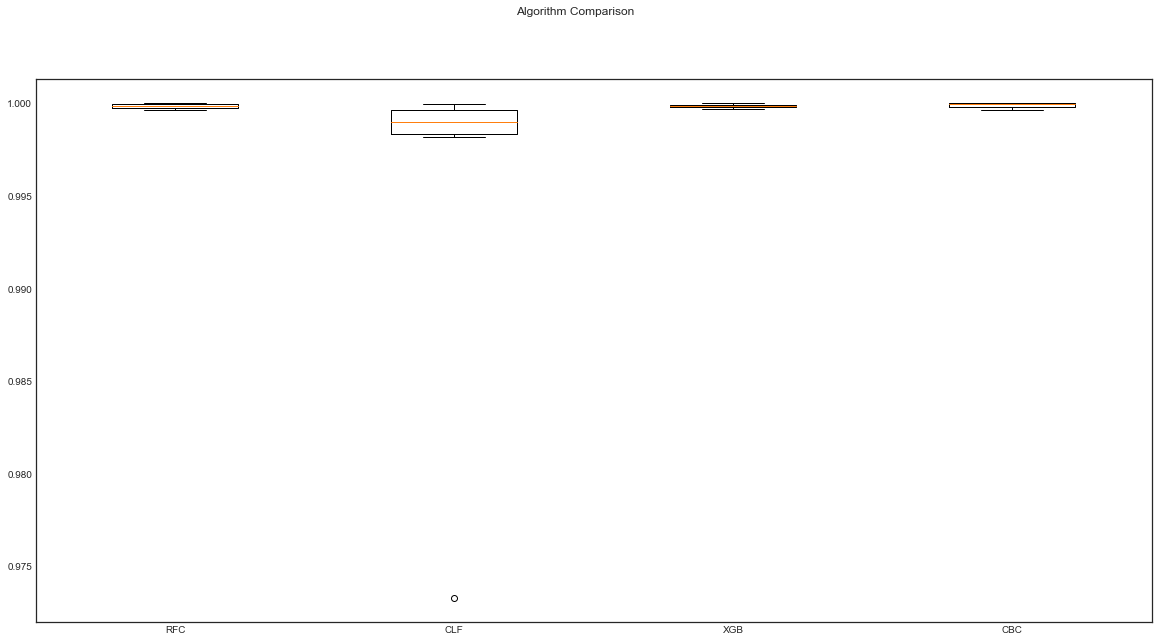

In [66]:
# model comparison

compare = X_pca.values
X = compare[:,0:8]
Y = compare[:,8]

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('RFC', ensemble.RandomForestClassifier()))
models.append(('CLF', ensemble.GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('CBC', CatBoostClassifier(silent=True)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

## Machine Learning Conclusions  

Model performance as evaluated by recall score was higher before performing dimensionality reduction via PCA.  Using the selected data as an indicator of performance, catboost and random forest were the strongest performers.  Performing PCA seems to affect each model's performance differently.  Random forest, svm, and catboost all performed worse based on recall scores.  However, SVM's cross validation scores increased noticeably even though recall dropped 40%. 

After PCA, gradient boost and xgboost were the strongest performers.  It's possible that too much variance is being lost through principal components analysis, which is evident in the recall scores.  Different methods of feature engineering might have a better impact on accuracy as measured by recall score.  This would have to be evaluated in the future, and using more data from the dataset would likely be beneficial as well.  

Ensemble models performed better for this dataset than individual models and would yield the best results for testing predictions in a production environment. 

In [67]:
# delete variables; models perform better

del X_train
del X_test
del y_pred
del rfc
del xgb
del cbc

# United States Comparison Analysis

## How does the fertility rate of the US compare to the 21 selected countries?  

The United States has a low fertility rate, and falls in the category of countries with fertility rates of less than 3 births per woman.

In [68]:
# create df of US data

us = pd.DataFrame(stats[stats.Country=='United States'])

In [69]:
# combine individual country dataframes & set column names

df = pd.concat([us, world], axis=0, ignore_index=True)
df.columns = stats.columns

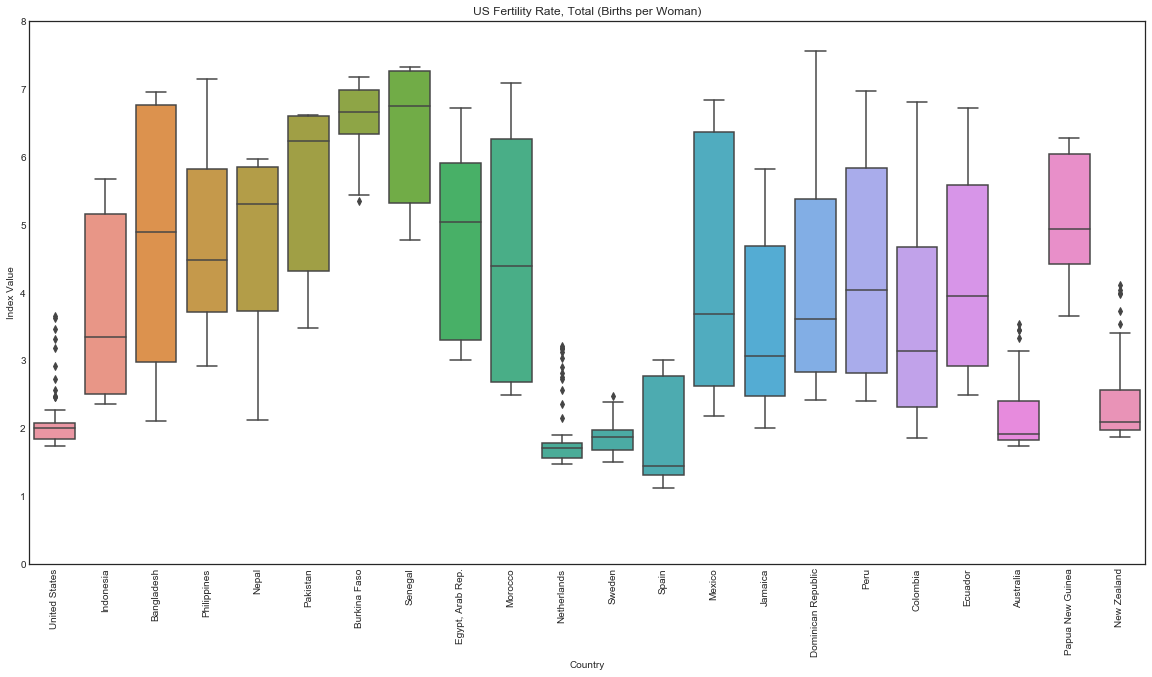

In [70]:
# global fertility rate, total (births, per woman)

sns.boxplot(x='Country', y='Index_Value', data=df[df.Indicator_Code=='SP.DYN.TFRT.IN'])
plt.xticks(rotation=90)
plt.title('US Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

## How stable is the United States' fertility rate?

The United States has a very stable fertility rate with a standard deviation of 0.47.

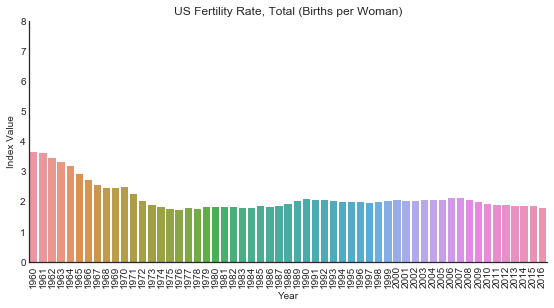

In [71]:
# US fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

## Fertility rate changes  

Numerous varied reasons explain fertility rates, which began their downward trend beginning in the early 1970s.  Factors affecting fertility rates included women entering the workforce, availability of birth control, the Vietnam War, and an increase in education.   

In [72]:
us.loc[(us.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,2.14
std,0.47
min,1.74
25%,1.84
50%,2.00
75%,2.08
max,3.65


## Feature Importance  

XGBoost classifier and CatBoost Classifier models were run for feature importance comparison against the global dataset.

In [73]:
# get dummies for the US

features_us = pd.get_dummies(us[['Indicator_Code', 'Year', 'Index_Value']])

In [74]:
y = features_us[('Indicator_Code_SP.DYN.TFRT.IN')]
features_us.drop(['Indicator_Code_SP.DYN.TFRT.IN'], axis=1, inplace=True)

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features_us, y, test_size=0.3, random_state=42)

In [75]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
# xgboost classifier

xgb = XGBClassifier(iterations=2, learning_rate=1, depth=2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, depth=2, gamma=0, iterations=2, learning_rate=1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## What are the most significant features affecting fertility rates?  

Both random forest and xgboost identified index value and the percentage of the male population aged 80 and the annual percentage of urban population growth among the top 4 features.  They differed on the percentage of annual population growth for random forest, and the percentage of the male population aged 75-79 for xgboost.

                                  importance
Feature                                     
Index_Value                             0.66
Indicator_Code_SP.POP.80UP.MA.5Y        0.03
Indicator_Code_SP.URB.GROW              0.02
Indicator_Code_SP.POP.GROW              0.02
Indicator_Code_SP.RUR.TOTL.ZG           0.02
Indicator_Code_SH.MED.PHYS.ZS           0.02
Indicator_Code_SP.POP.7579.MA.5Y        0.02
Indicator_Code_SP.POP.7074.MA.5Y        0.01
Indicator_Code_SP.POP.7579.FE.5Y        0.01
Year_1963                               0.01
Year_1960                               0.01
Year_1974                               0.01
Year_1996                               0.01
Indicator_Code_SH.UHC.OOPC.25.ZS        0.01
Indicator_Code_SH.UHC.NOP2.ZG           0.01
Year_1965                               0.01
Year_1977                               0.01
Indicator_Code_SH.UHC.NOP1.CG           0.01
Indicator_Code_SP.POP.80UP.FE.5Y        0.01
Year_1999                               0.01


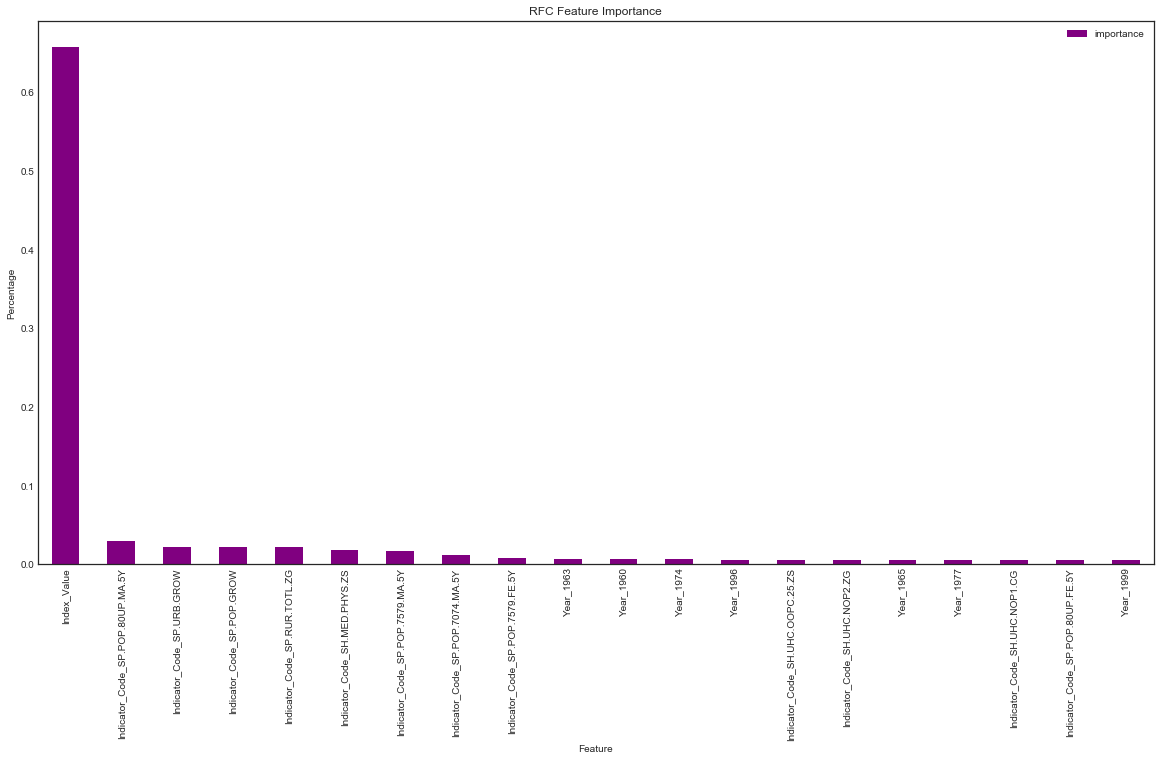

In [77]:
importances = pd.DataFrame({'Feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('Feature')
 
print(importances[:20])
importances[:20].plot.bar(color='purple')
plt.title('RFC Feature Importance')
plt.ylabel('Percentage');

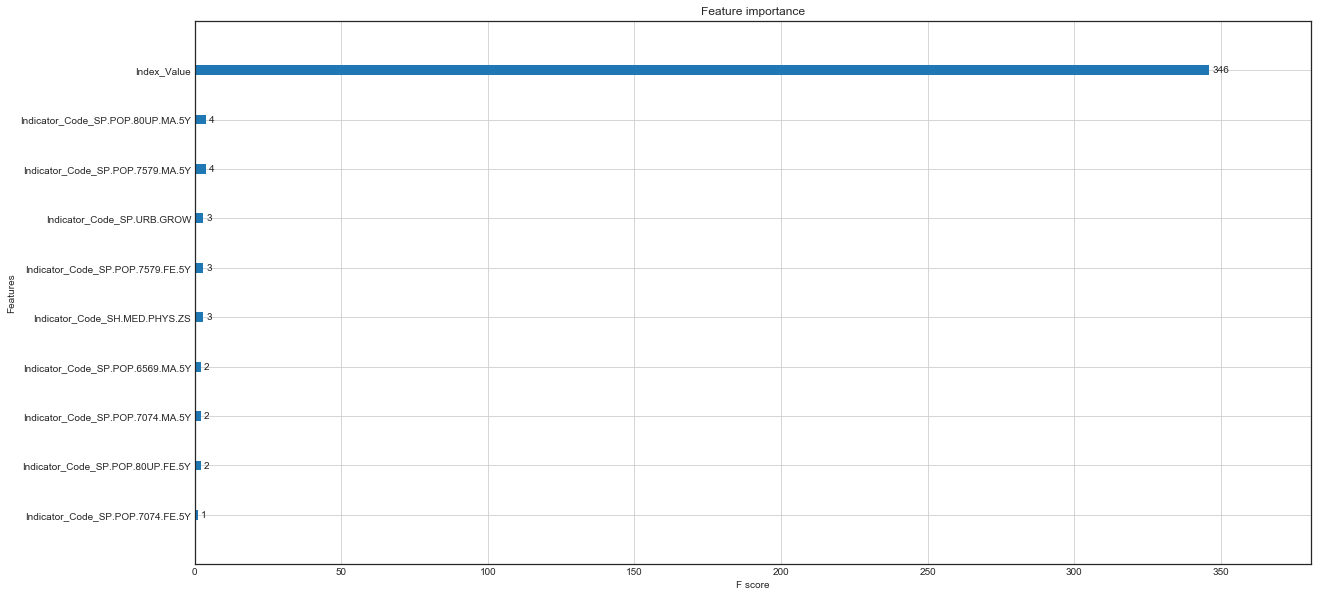

In [78]:
# xgboost classifier feature importance

plot_importance(xgb)
plt.show()

**Random forest and xgboost were both consistent and identified nearly identical features as the most important.**

## How are fertility rates affecting population levels?  

The features identified as important reflect the current trend in global societies.  The birth rate is declining while the aging population is increasing.  Population growth is declining and the current fertility rate is below the replacement rate. This means there are not enough births to maintain the current population level.  Population decline will have long term effects on the economy, availability of resources and the current working population.  

While these are some of the negative effects, decreased global population will lead to better environmental conditions and potentially reduce the negative impacts of human overconsumption.

## Policy Recommendations   

To increase fertility rates, the focus needs to be on easing the burden for families by reducing costs associated childcare, lower education costs and better debt management.  Additionally, incentives for childless adults and couples could help boost fertility rates.